## Netflix Top 10
(in the US in between 1. April 2020 and 11. March 2022)

done by Claudia Sanchez Muñoz, Giacomo Terragni, and Oscar von Moeller

In [1]:
# All Imports are done here
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import holidays

ModuleNotFoundError: No module named 'holidays'

---
### EDA
The dataset had in its Columns Days in Top 10 and

In [3]:
# Load the CSV
# data = pd.read_csv('netflix_top_10.csv')
data = pd.read_table("C:/Users/33789/OneDrive/Desktop/EDA/data_madness/netflix_daily_top_10.csv", ',')
data.head()

C:\Users\33789\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
def cleaning(data_rem):
    # move "Stand-Up Comedy" and "Concert/Performance" to Movies
    data_rem.loc[~data_rem['Type'].isin(['Movie', 'TV Show']), 'Type'] = 'Movie'

    # netflix Exclusive has yes and NaN -> fill NaN with no
    data_rem["Netflix Exclusive"] = data_rem['Netflix Exclusive'].fillna('No')
    return data_rem

In [8]:
def datetime_change (data_rem):
    # Prepare data for further tasks (Date time objects for As Of Column and Netflix Release
    # transform date format of 'Netflix Release Date' and 'As of'
    data_rem['Netflix Release Date'] = pd.to_datetime(data['Netflix Release Date'])
    data_rem['As of'] = pd.to_datetime(data['As of'])
    return data_rem

In [9]:
def rem_previous(data_rem):
    # Adding Temp Columns for the transformation
    data_rem['Days_10'] = 0
    data_rem['Viewership'] = 0

    for ind, row in data_rem.iterrows():
        #Getting all instances with the same title to calc minimum date
        temp_df = data_rem.loc[data_rem['Title'] == row['Title']]
        # Getting the minimum of the Days in Top 10 and Viewership score connected to a title
        mini_days = temp_df['Days In Top 10'].min()
        mini_view = temp_df['Viewership Score'].min()
        # Adding the updated values in a new column
        data_rem.iloc[[ind],[10]] = row['Days In Top 10'] - mini_days + 1
        data_rem.iloc[[ind],[11]] = row['Viewership Score'] - mini_view + (11 - row['Rank'])

    # After the now updated column re-assigning the data and dropping the temporary column
    data_rem['Days In Top 10'] = data_rem.loc[:, 'Days_10']
    data_rem['Viewership Score'] = data_rem.loc[:, 'Viewership']
    data_rem = data_rem.drop(columns=['Days_10', 'Viewership'])
    return data_rem

In [10]:
def clean_data(data_rem):
    data_rem = cleaning(data_rem)
    data_rem = datetime_change(data_rem)
    data_rem = rem_previous(data_rem)
    return data_rem

In [29]:
def bytitle(data):
    titles = data.set_index('Title')
#not taking into account the dates and Year/Last Week Rank
    titles = titles[["Rank",  "Type", "Netflix Exclusive", "Netflix Release Date", "Days In Top 10", "Viewership Score"]]
    #take the mean rank of all appearance of object, its type, if netflix eclsuive, the maximum amount stayed in top 1O list and its max viewership score recorded
    titles = data.groupby('Title').agg({'Rank' : 'mean', 'Type': 'first', 'Netflix Exclusive': 'first', 'Netflix Release Date': 'first', "Days In Top 10": 'max', 'Viewership Score':'max'})

In [16]:
data = clean_data(data)
data.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,1,10
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,1,9
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,1,8
3,2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,1,7
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,1,8


### Ethical Analysis
The data collected is from all Netflix viewers in the United States over the period from `1. April 2020` until `11. March 2022`. The privacy of every netflix user was upheld as Netflix has many Customers, which use the platform. Watching a TV Show or Movie added to the daily count for each and the top 10 overall were recorded. This did not expose any individual user to the data collection. In turn the data we have access to are very much anonymized, thus we can not get any individual users information from the data set.

---
### Movies vs TV Shows
This is the section where we analyse the differences between Movies and TV shows in the Top 10.

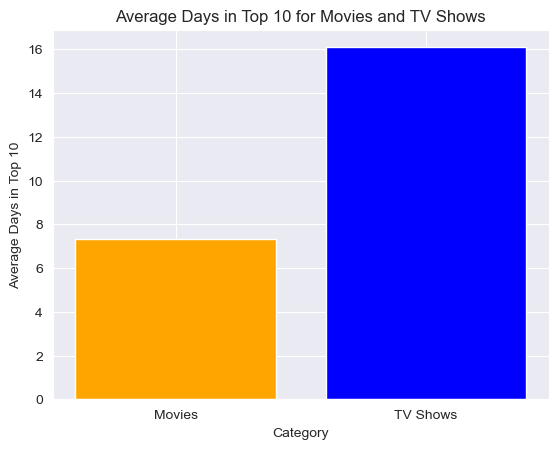

In [8]:
categories = ['Movies', 'TV Shows']
average_days = [7.34, 16.09]
colors = ['orange', 'blue']

# Create the plot
fig, ax = plt.subplots()
ax.bar(categories, average_days, color=colors)

# Add labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Average Days in Top 10')
ax.set_title('Average Days in Top 10 for Movies and TV Shows')

# Show the plot
plt.show()

In [9]:
#check cathegories
print(data['Type'].unique())

['TV Show' 'Movie']


Due to the limited number of instances under the categories "Stand-Up Comedy" and "Concert/Performance" (41 and 2 respectively), we decided to investigate them and determine whether to delete them or reclassify them as Movie or TV Show types. This was done to simplify the analysis and reduce the number of type categories. After reviewing the shows under these categories, we found that they share many similarities with movies and, therefore, we have decided to reclassify them as Movie type instances.

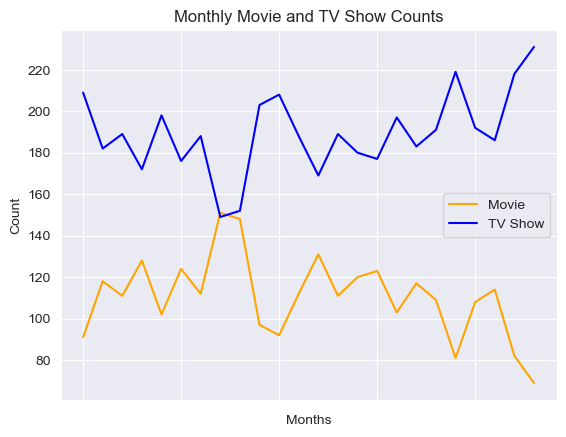

In [10]:
type_column = data["Type"]

# number of occurrences of "Movie" every 300 rows(10 rows per day, 1 month)
movie_counts = [type_column[i:i+300].tolist().count("Movie") for i in range(0, len(type_column), 300)]
#create array(each slot is a month)
totalM = len(movie_counts)

fig, ax = plt.subplots()
#print movies
ax.plot(movie_counts, color="orange")
#print tv shows (# of shows = 300(total days in a month)- #movies(during those 300 days))
ax.plot([300-count for count in movie_counts], color="blue")
ax.set_ylabel("Count")
ax.set_xlabel("Months")
plt.title("Monthly Movie and TV Show Counts")

plt.legend(labels=["Movie","TV Show"], loc=7)

ax.set_xticklabels([])
plt.show()

Text(0.5, 1.0, 'Monthly Movie and TV Show Counts')

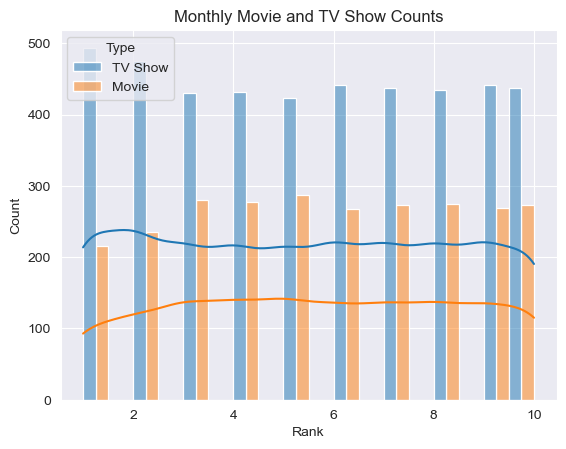

In [11]:
#histogram plot on average rank for each cathegory
sns.histplot(data=data, x="Rank", hue="Type",  kde=True, multiple="dodge",)
plt.title("Monthly Movie and TV Show Counts")

In [18]:
#group tv shows and movies by title
idx = data.groupby(['Title'])['Days In Top 10'].idxmax()
data_mt = data.loc[idx]

# compute number of days between start and end dates in 'days_between'
data_mt['days_between'] = (data_mt['As of'] - data_mt['Netflix Release Date']).dt.days

In [19]:
dataM = data_mt[data_mt['Type'] == 'Movie']
dataS = data_mt[data_mt['Type'] != 'Movie']

In [20]:
#stats on movies and shows
print("#movies: ", dataM.shape[0])
print("#Tv Shows: ", dataS.shape[0])
print("#days in top 10 Movies: ", dataM['Days In Top 10'].sum())
print("#days in top 10 Tv Shows ", dataS['Days In Top 10'].sum(), '\n')
print("avg. days in top 10 per movie: 7.34 days")
print("avg. days in top 10 per tv show: 16.09")

#movies:  362
#Tv Shows:  283
#days in top 10 Movies:  2637
#days in top 10 Tv Shows  4448 

avg. days in top 10 per movie: 7.34 days
avg. days in top 10 per tv show: 16.09


Text(0.5, 1.0, 'distribution of days in top 10:')

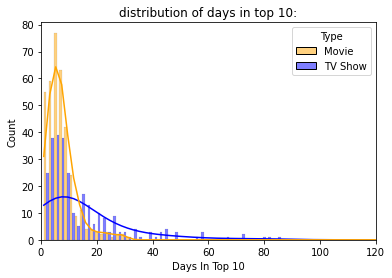

In [21]:
#print distribution of Movies and Tv Shows
colors = {"TV Show": "blue", "Movie": "orange"}
ax = sns.histplot(data=data_mt, x="Days In Top 10", hue="Type",  kde=True, multiple="dodge", palette=colors)
ax.set_xlim(0, 120)
plt.title('distribution of days in top 10:')

Text(0.5, 1.0, 'distribution of days in top 10:')

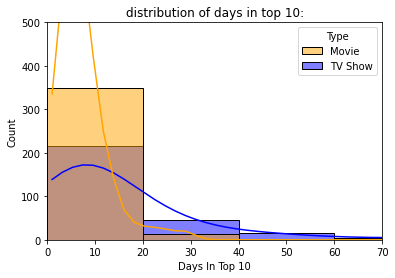

In [22]:
#print distribution of Movies and Tv Shows using overlapping boxes
colors = {"TV Show": "blue", "Movie": "orange"}
ax = sns.histplot(data=data_mt, x="Days In Top 10", hue="Type",  kde=True, bins=[0, 20, 40, 60, 80,100, 120], palette=colors)
ax.set_xlim(0, 70)
ax.set_ylim(0, 500)
plt.title('distribution of days in top 10:')

Conclusion: both distributions have the highest peak between 0 and 20 days in top 10 meaning that in general both movies and tv shows remain in top 10 for around 5-10 days on average. Neverthless, the organge distribution (TV Shows) presents a much bigger variance meaning that there are still a relevant amount of TV shows that remained in the top 10 for many more days, indeed the distributions spreads till even 80 days spent in the top 10. Therefpre, it can be concluded that this plot confirms the previous hypothesis that TV shows tend to remain in the top 10 longer than movies.

---
### Holidays


In [27]:
# Getting the Holidays from the US
holiday = holidays.US(years=[2020, 2021, 2022])
# adding regional Holidays for States with more than 5% of the total US Population (Over ~16.66 Million of the 333.3 Million American Citizens)
# Based on the July 1, 2022 Census https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html#v2022
holidays_CA = holidays.country_holidays('US', subdiv='CA', years=[2020, 2021, 2022])
holidays_FL = holidays.country_holidays('US', subdiv='FL', years=[2020, 2021, 2022])
holidays_NY = holidays.country_holidays('US', subdiv='NY', years=[2020, 2021, 2022])
holidays_TX = holidays.country_holidays('US', subdiv='TX', years=[2020, 2021, 2022])

NameError: name 'holidays' is not defined

In [24]:
#Add all holidays together
holidays_major = holiday + holidays_CA + holidays_FL + holidays_NY + holidays_TX

NameError: name 'holiday' is not defined

In [25]:
data_holidays = data.loc[data['As of'].isin(holidays_major.keys())]
data_not_holi = data.loc[~data['As of'].isin(holidays_major.keys())]

NameError: name 'holidays_major' is not defined

In [26]:
holidays_tv = data_holidays.loc[data_holidays['Type'] == 'TV Show']
holidays_mov = data_holidays.loc[data_holidays['Type'] == 'Movie']

NameError: name 'data_holidays' is not defined

In [21]:
count = data['Type'].value_counts()
ratio_tv = count['TV Show'] / data.shape[0]
ratio_mov = 1 - ratio_tv
print(f'TV Shows: {round(ratio_tv * 100, 2)}%, Movies: {round(ratio_mov * 100, 2) }% in the entire dataset')

count_holi = data_holidays['Type'].value_counts()
ratio_tv_holi = count_holi['TV Show'] / data_holidays.shape[0]
ratio_mov_holi = 1 - ratio_tv_holi
print(f'TV Shows: {round(ratio_tv_holi * 100, 2)}% & Movies {round(ratio_mov_holi * 100, 2)}% Top 10 percentage during the holidays')

count_not = data_not_holi['Type'].value_counts()
ratio_tv_not = count_not['TV Show'] / data_not_holi.shape[0]
ratio_mov_not = 1 - ratio_tv_not
print(f'TV Shows: {round(ratio_tv_not * 100, 2)}%, Movies: {round(ratio_mov_not * 100, 2)}% during non holidays')

print("Holiday dataset Length:",data_holidays.shape[0])
print(f'TV shows count {count_holi["TV Show"]}, movies: {count_holi["Movie"]} during the Holidays')

TV Shows: 62.62%, Movies: 37.38% in the entire dataset
TV Shows: 60.4% & Movies 39.6% Top 10 percentage during the holidays
TV Shows: 62.79%, Movies: 37.21% during non holidays
Holiday dataset Length: 500
TV shows count 302, movies: 198 during the Holidays


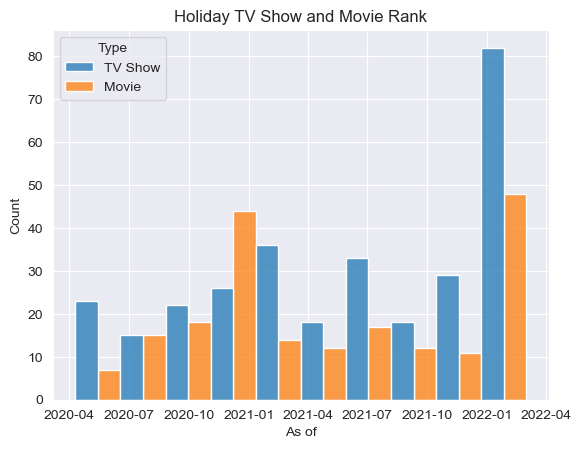

In [22]:
# show based on dates
plt.figure()
sns.histplot(data=data_holidays, x='As of', hue='Type', multiple="dodge")
plt.title("Holiday TV Show and Movie Rank")
plt.show()

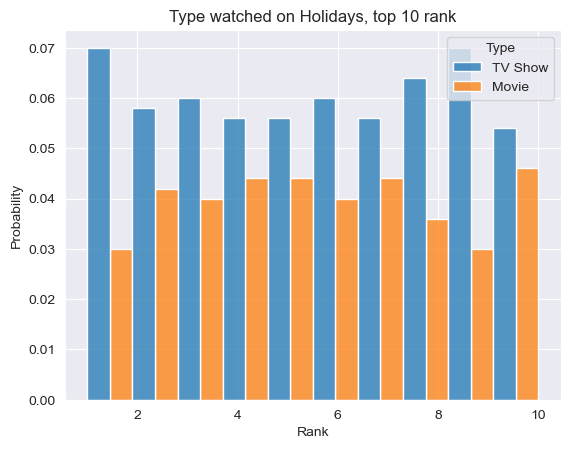

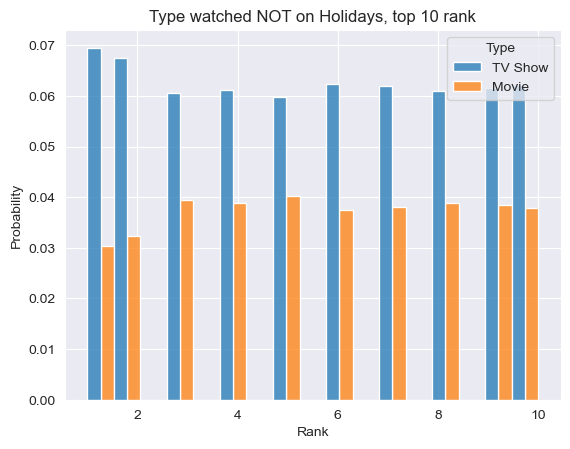

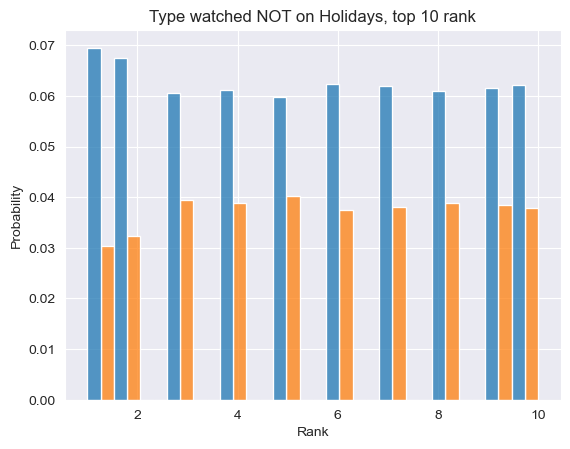

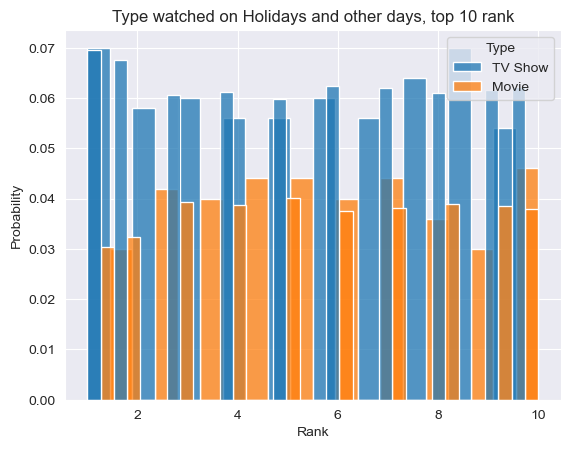

In [23]:
# SHow by Rank, all the styles needed for the Video (separate, combined and without legend)
plt.figure()
sns.histplot(data=data_holidays, x='Rank', hue='Type', stat='probability', multiple='dodge')
plt.title('Type watched on Holidays, top 10 rank')
plt.show()
plt.figure()
sns.histplot(data=data_not_holi, x='Rank', hue='Type', stat='probability', multiple='dodge')
plt.title('Type watched NOT on Holidays, top 10 rank')
plt.show()
plt.figure()
sns.histplot(data=data_not_holi, x='Rank', hue='Type', stat='probability', multiple='dodge', legend=False)
plt.title('Type watched NOT on Holidays, top 10 rank')
plt.show()
plt.figure()
sns.histplot(data=data_holidays, x='Rank', hue='Type', stat='probability', multiple='dodge')
sns.histplot(data=data_not_holi, x='Rank', hue='Type', stat='probability', multiple='dodge')
plt.title('Type watched on Holidays and other days, top 10 rank')
plt.show()

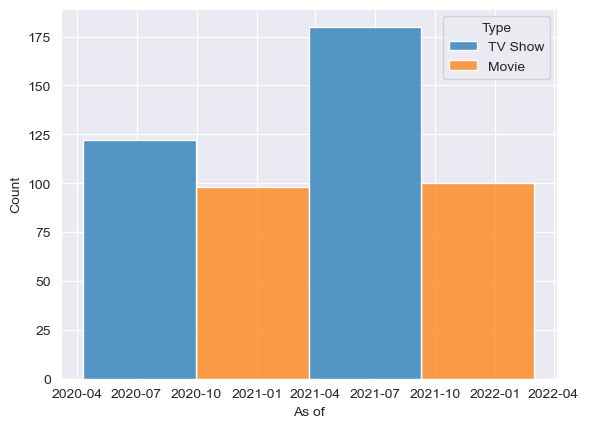

In [24]:
# show by year
plt.figure()
sns.histplot(data=data_holidays, x='As of', hue='Type', multiple="dodge", bins=2)
plt.show()

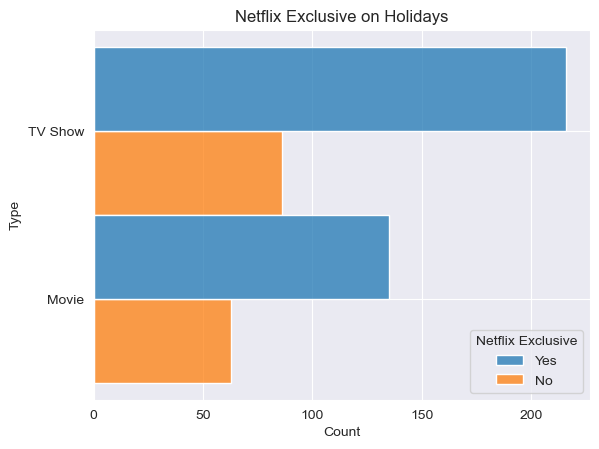

In [25]:
# show by netflix excusive
plt.figure()
sns.histplot(data=data_holidays, y='Type', hue='Netflix Exclusive', multiple="dodge")
plt.title('Netflix Exclusive on Holidays')
plt.show()
# show viewership score

Concluding the Holidays section, We see that there is a minor increase of movies in the top 10 viewings. This is surprising as we had the basic assumption that TV Shows would be more popular as the people have the time to spend and especially during the pandemic not that much else to do.
But the analysis reveals that the TV Shows are not increasingly in the top 10, but Movies are 2.5% more popular than on non holidays.

---
### Netflix Exclusive Bias


In [33]:
# Is there a bias on the duration of how long content is in top 10 of own content versus foreign content
data =data.replace({'Netflix Exclusive': {None: 'No'}})
# exclusive = data[data['Netflix Exclusive'] == 'Yes']
# foreign = data[data['Netflix Exclusive'] == 'No']
# data_mt.head()

# titles = bytitle(data)
#not taking into account Year/Last Week Rank, take avg of rank per object, the max of days in top 10 and its max vierwership score. 
# titles = titles[["Rank",  "Type", "Netflix Exclusive", "Netflix Release Date", "Days In Top 10", "Viewership Score"]]
titles = data.groupby('Title').agg({'Rank' : 'mean', 'Type': 'first', 'Netflix Exclusive': 'first', 'Netflix Release Date': 'first', "Days In Top 10": 'max', 'Viewership Score':'mean'})

titles.head()

,Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
Title,,,,,,
#Alive,5.333333,Movie,Yes,2020-09-08,6,19.666667
#blackAF,6.625000,TV Show,Yes,2020-04-17,8,21.625000
(Un)Well,7.000000,TV Show,Yes,2020-08-12,6,14.000000
13 Reasons Why,3.636364,TV Show,Yes,2017-03-31,22,95.818182
17 Again,6.285714,Movie,No,2021-01-01,7,22.285714


Text(0.5, 1.0, 'Average Rankig Per Title')

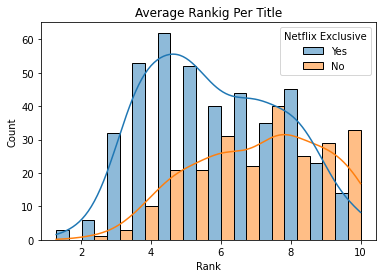

In [34]:
sns.histplot(data=titles, x="Rank", hue="Netflix Exclusive",  kde=True, multiple="dodge")
plt.title('Average Rankig Per Title')

C:\Users\33789\AppData\Local\Temp/ipykernel_8300/1907987073.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avgE = titles[titles['Netflix Exclusive'] == 'Yes'].mean()
C:\Users\33789\AppData\Local\Temp/ipykernel_8300/1907987073.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avgE = titles[titles['Netflix Exclusive'] == 'Yes'].mean()
C:\Users\33789\AppData\Local\Temp/ipykernel_8300/1907987073.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avgN = titles[titles['Netflix Exclusive'] == 'No'].mean()
C:\Users\33789\AppData\Local\Temp/ipykernel_8300/1907987073.py:2: FutureWarning: Dropping of nuisance columns in DataF

Text(0.5, 1.0, 'Average Rankig Per Title')

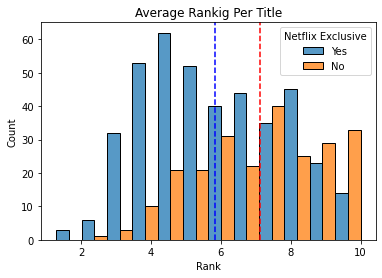

In [35]:
avgE = titles[titles['Netflix Exclusive'] == 'Yes'].mean()
avgN = titles[titles['Netflix Exclusive'] == 'No'].mean()
sns.histplot(data=titles, x="Rank", hue="Netflix Exclusive",  kde=False, multiple="dodge")
plt.axvline(x=avgE['Rank'], color='blue', linestyle='dashed')
plt.axvline(x=avgN['Rank'], color='red', linestyle='dashed')
plt.title('Average Rankig Per Title')

Text(0.5, 1.0, 'General Ranking Frequency')

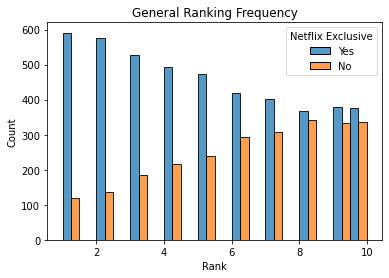

In [36]:
sns.histplot(data=data, x="Rank", hue="Netflix Exclusive", multiple="dodge")
plt.title('General Ranking Frequency')

<AxesSubplot:xlabel='Rank', ylabel='Density'>

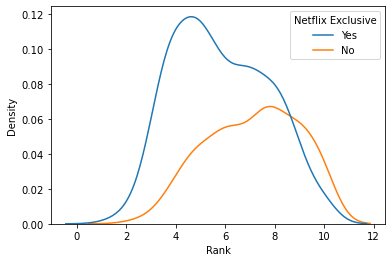

In [37]:
sns.kdeplot(data=titles, x="Rank", hue="Netflix Exclusive")

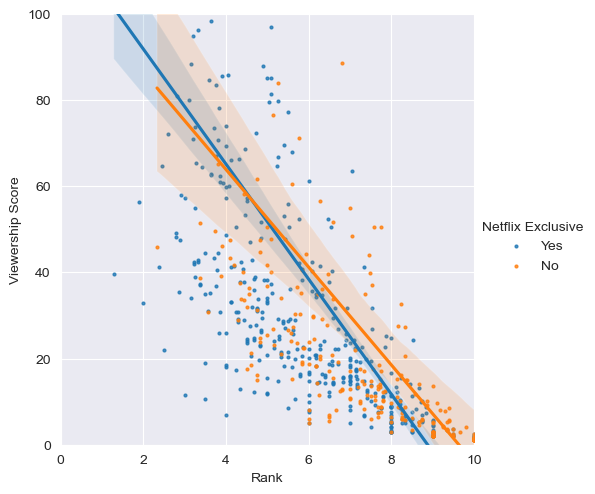

In [33]:
# Days in TOP 10 or VIEWERSHIP SCORE
g = sns.lmplot(data = titles,  x = 'Rank', y = 'Viewership Score',fit_reg=True, hue = "Netflix Exclusive", scatter_kws={"s": 4})
g.set(xlim = (0,10), ylim =(0,100))

trends to similar to jump state anything

<AxesSubplot:xlabel='Days In Top 10', ylabel='Viewership Score'>

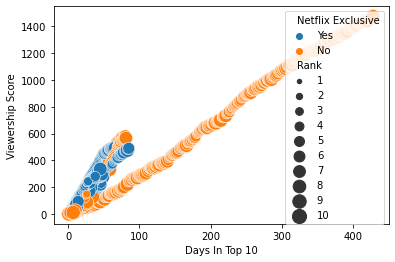

In [38]:
#playing around with visualization techniques, but wont be part of the video
sns.scatterplot(
    data=data, x="Days In Top 10", y="Viewership Score", hue="Netflix Exclusive", size="Rank",
    sizes=(20, 200), legend="full"
)

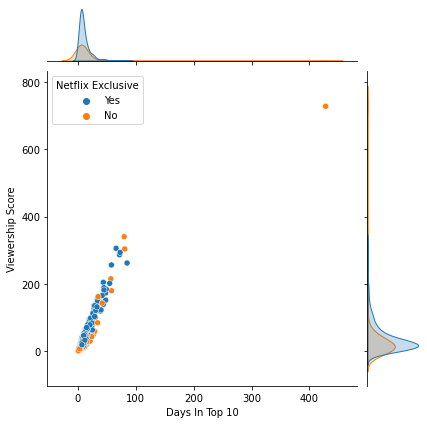

In [40]:
p = sns.jointplot(titles, x = 'Days In Top 10', y = 'Viewership Score', hue = 'Netflix Exclusive')

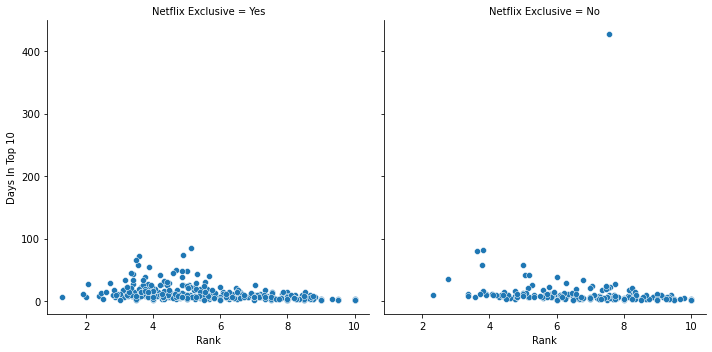

In [41]:
sns.relplot(data=titles, x="Rank", y="Days In Top 10",  col="Netflix Exclusive")

In [44]:
titles[titles['Viewership Score'] >600]

,Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
Title,,,,,,
Cocomelon,7.556075,TV Show,No,2020-06-01,428,728.009346


In [47]:
ne =titles[titles['Netflix Exclusive'] == 'Yes']
nn = titles[titles['Netflix Exclusive'] == 'No']

# counting how many non exclusive objects have a higher rank or equal to 5 (top 5 list)
nn_high = nn[nn['Rank']<6]
nn_t5 = nn_high.count()[0]
nn = nn.drop('Cocomelon')
print("non exclusive in the top 5:", nn_t5)
ne_high = ne[ne['Rank']<6]
ne_t5 = ne_high.count()[0]
print("exclusive in the top 5:", ne_t5)

non exclusive in the top 5 68
exclusive in the top 5 221


Text(0.5, 1.0, 'Neflix Exclusive objs Viewership vs Days in top 10')

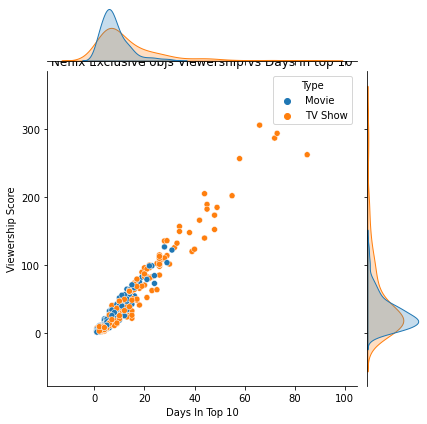

In [51]:
sns.jointplot(ne, x = 'Days In Top 10', y = 'Viewership Score', hue = 'Type')
plt.title("Neflix Exclusive objs Viewership vs Days in top 10")

Text(0.5, 1.0, 'NON Exclusive objs Viewership vs Days in top 10')

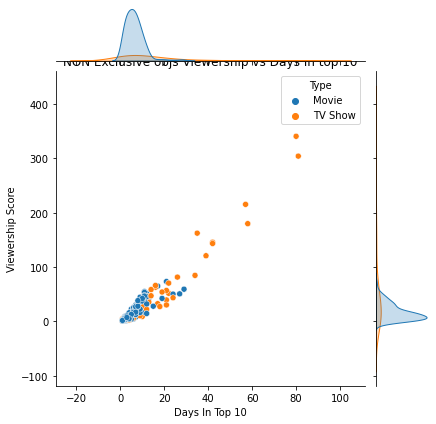

In [53]:
sns.jointplot(nn, x = 'Days In Top 10', y = 'Viewership Score', hue = 'Type')
plt.title("NON Exclusive objs Viewership vs Days in top 10")

We say a similar behavoir in both categories that tv shows have a higher viewer score. Coming back that TV shows were longer seen that Movies, thus their viewership score will be larger by definition

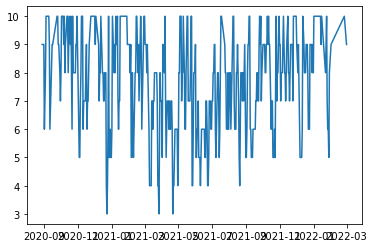

In [55]:
# Analyzing the top performing series, Cocomelon
titles.loc['Cocomelon']
cocomelon = data[data["Title"] == 'Cocomelon']
plt.plot(cocomelon['As of'], cocomelon['Rank'])